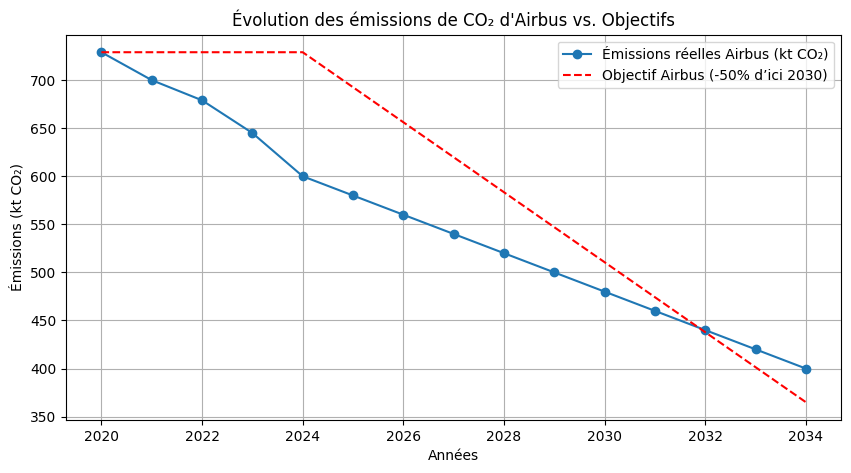

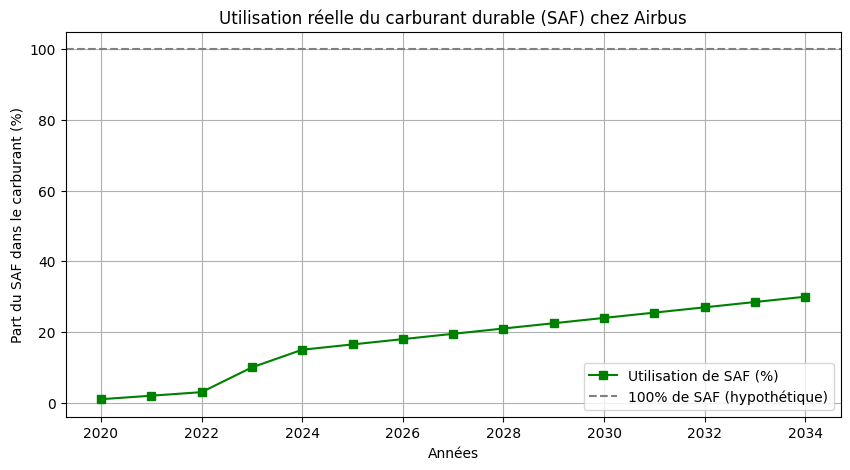

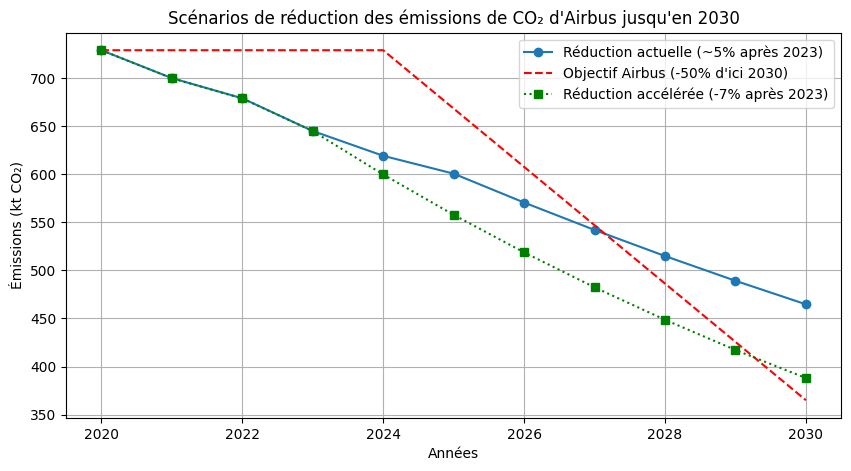

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 📌 Données fictives basées sur le rapport et les tendances du marché
temps = np.arange(2020, 2035)

# Émissions actuelles et projetées (en kilotonnes de CO₂)
emissions_co2 = [729, 700, 679, 645] + list(np.linspace(600, 400, len(temps) - 4))  # Réduction progressive

# Objectif Airbus (-50% d’ici 2030 par rapport à 2020)
objectif_airbus = [729] * 4 + list(np.linspace(729, 365, len(temps) - 4))

# Part de SAF dans le carburant utilisé
saf_utilisation = [1, 2, 3, 10] + list(np.linspace(15, 30, len(temps) - 4))  # Airbus annonce 30% en 2030

# 📊 Visualisation des émissions
plt.figure(figsize=(10, 5))
plt.plot(temps, emissions_co2, label="Émissions réelles Airbus (kt CO₂)", marker="o", linestyle="-")
plt.plot(temps, objectif_airbus, label="Objectif Airbus (-50% d’ici 2030)", linestyle="--", color="red")
plt.xlabel("Années")
plt.ylabel("Émissions (kt CO₂)")
plt.title("Évolution des émissions de CO₂ d'Airbus vs. Objectifs")
plt.legend()
plt.grid(True)
plt.show()

# 📊 Visualisation de l'utilisation de SAF
plt.figure(figsize=(10, 5))
plt.plot(temps, saf_utilisation, label="Utilisation de SAF (%)", marker="s", linestyle="-", color="green")
plt.axhline(y=100, color="gray", linestyle="--", label="100% de SAF (hypothétique)")
plt.xlabel("Années")
plt.ylabel("Part du SAF dans le carburant (%)")
plt.title("Utilisation réelle du carburant durable (SAF) chez Airbus")
plt.legend()
plt.grid(True)
plt.show()

# 📌 Modélisation des scénarios de réduction des émissions jusqu'en 2030

# Définition des années
annees = np.arange(2020, 2031)  # Assure qu'on a bien 11 valeurs

# Scénario 1 : Réduction actuelle (~5%/an après 2023)
reduction_rate_scenario1 = [0.04, 0.03, 0.05] + [0.05] * (len(annees) - 4)
emissions_scenario1 = [729, 700, 679, 645]

for rate in reduction_rate_scenario1:
    emissions_scenario1.append(emissions_scenario1[-1] * (1 - rate))

# Ajuster la taille de emissions_scenario1
emissions_scenario1 = emissions_scenario1[:len(annees)]

# Scénario 2 : Objectif Airbus (-50% en 2030)
objectif_airbus = [729] * 4 + list(np.linspace(729, 365, len(annees) - 4))

# Scénario 3 : Réduction accélérée (~7%/an après 2023)
reduction_rate_scenario3 = [0.04, 0.03, 0.05] + [0.07] * (len(annees) - 4)
emissions_scenario3 = [729]

for rate in reduction_rate_scenario3:
    emissions_scenario3.append(emissions_scenario3[-1] * (1 - rate))

# Ajuster la taille de emissions_scenario3
emissions_scenario3 = emissions_scenario3[:len(annees)]

# 📊 Visualisation des scénarios
plt.figure(figsize=(10, 5))
plt.plot(annees, emissions_scenario1, label="Réduction actuelle (~5% après 2023)", linestyle="-", marker="o")
plt.plot(annees, objectif_airbus, label="Objectif Airbus (-50% d'ici 2030)", linestyle="--", color="red")
plt.plot(annees, emissions_scenario3, label="Réduction accélérée (-7% après 2023)", linestyle=":", marker="s", color="green")

plt.xlabel("Années")
plt.ylabel("Émissions (kt CO₂)")
plt.title("Scénarios de réduction des émissions de CO₂ d'Airbus jusqu'en 2030")
plt.legend()
plt.grid(True)
plt.show()


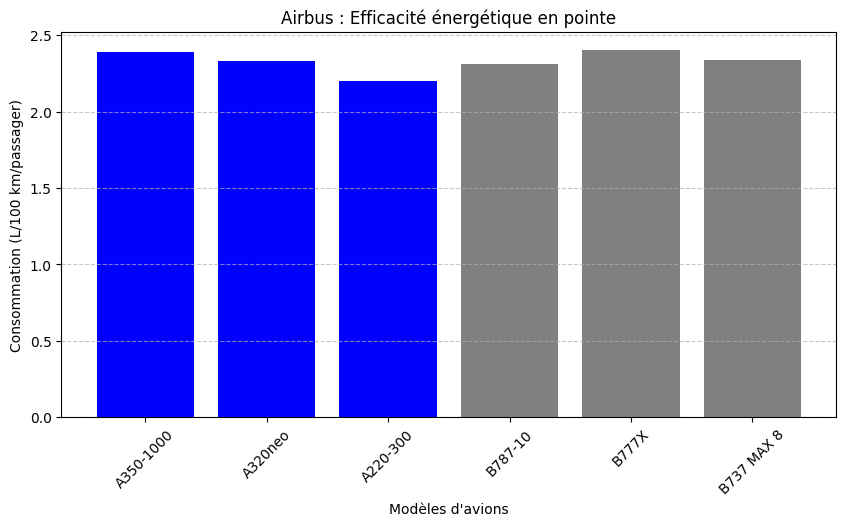

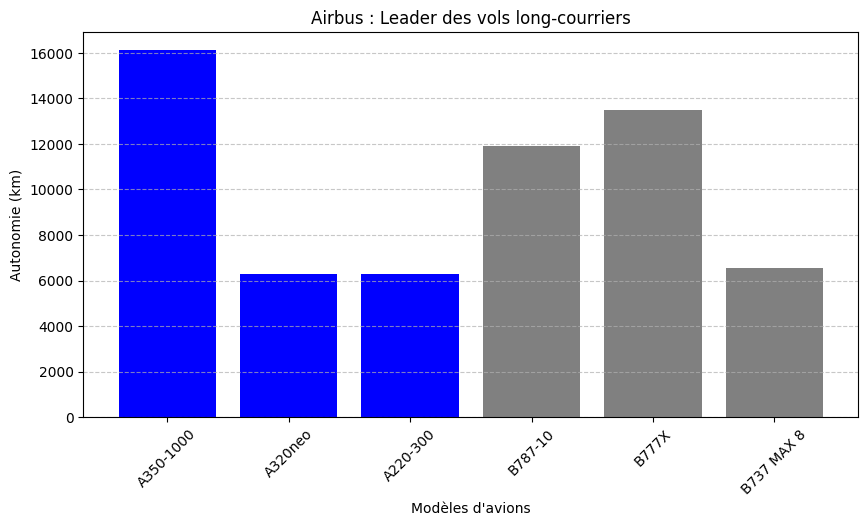

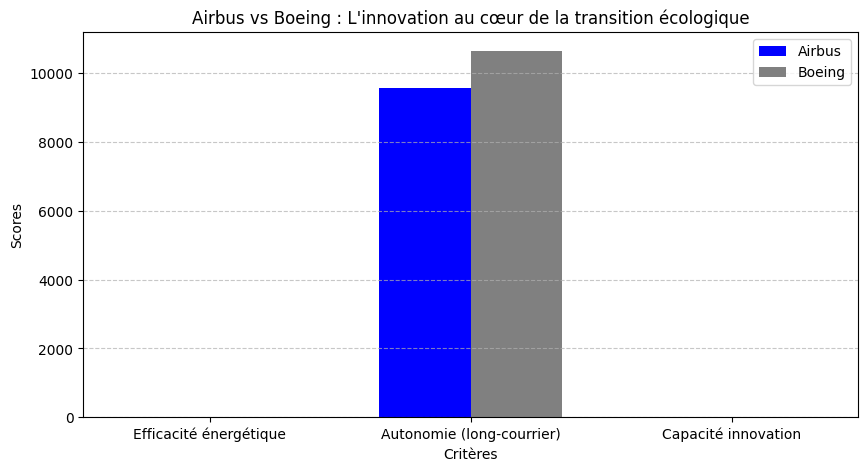

In [3]:
*

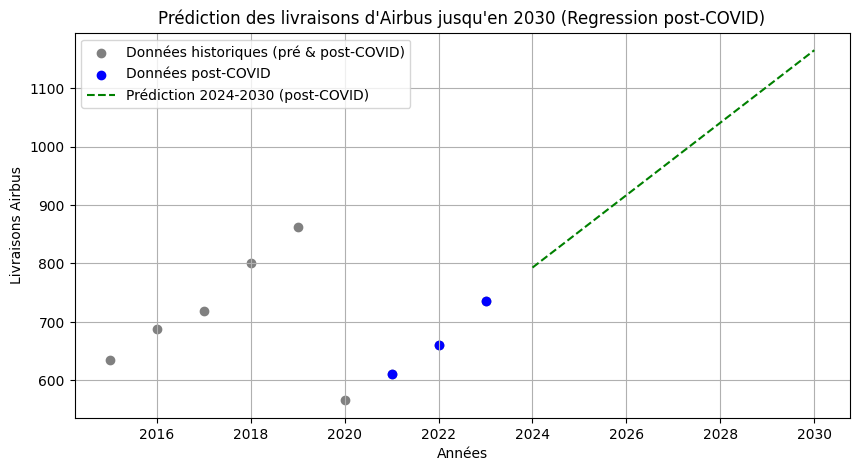

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# 📌 Données historiques des livraisons Airbus
annees = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]).reshape(-1, 1)
livraisons = np.array([635, 688, 718, 800, 863, 566, 611, 661, 735])

# 📌 Régression linéaire en prenant uniquement les données après COVID (2021-2023)
annees_post_covid = np.array([2021, 2022, 2023]).reshape(-1, 1)
livraisons_post_covid = np.array([611, 661, 735])

# 📈 Nouveau modèle de régression linéaire basé sur les données post-COVID
modele_post_covid = LinearRegression()
modele_post_covid.fit(annees_post_covid, livraisons_post_covid)

# Prédiction des livraisons de 2024 à 2030 avec cette tendance post-COVID
annees_futures = np.array([2024, 2025, 2026, 2027, 2028, 2029, 2030]).reshape(-1, 1)
predictions_post_covid = modele_post_covid.predict(annees_futures)

# 📌 Visualisation améliorée : Affichage de toutes les données mais régression après COVID
plt.figure(figsize=(10, 5))

# Affichage de toutes les données historiques
plt.scatter(annees, livraisons, color="gray", label="Données historiques (pré & post-COVID)")

# Affichage des données post-COVID en bleu
plt.scatter(annees_post_covid, livraisons_post_covid, color="blue", label="Données post-COVID")

# Affichage de la prédiction basée uniquement sur la reprise post-COVID
plt.plot(annees_futures, predictions_post_covid, color="green", linestyle="--", label="Prédiction 2024-2030 (post-COVID)")

# Labels et titre
plt.xlabel("Années")
plt.ylabel("Livraisons Airbus")
plt.title("Prédiction des livraisons d'Airbus jusqu'en 2030 (Regression post-COVID)")
plt.legend()
plt.grid(True)

# Affichage du graphique
plt.show()
